In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

(1000, 1000)


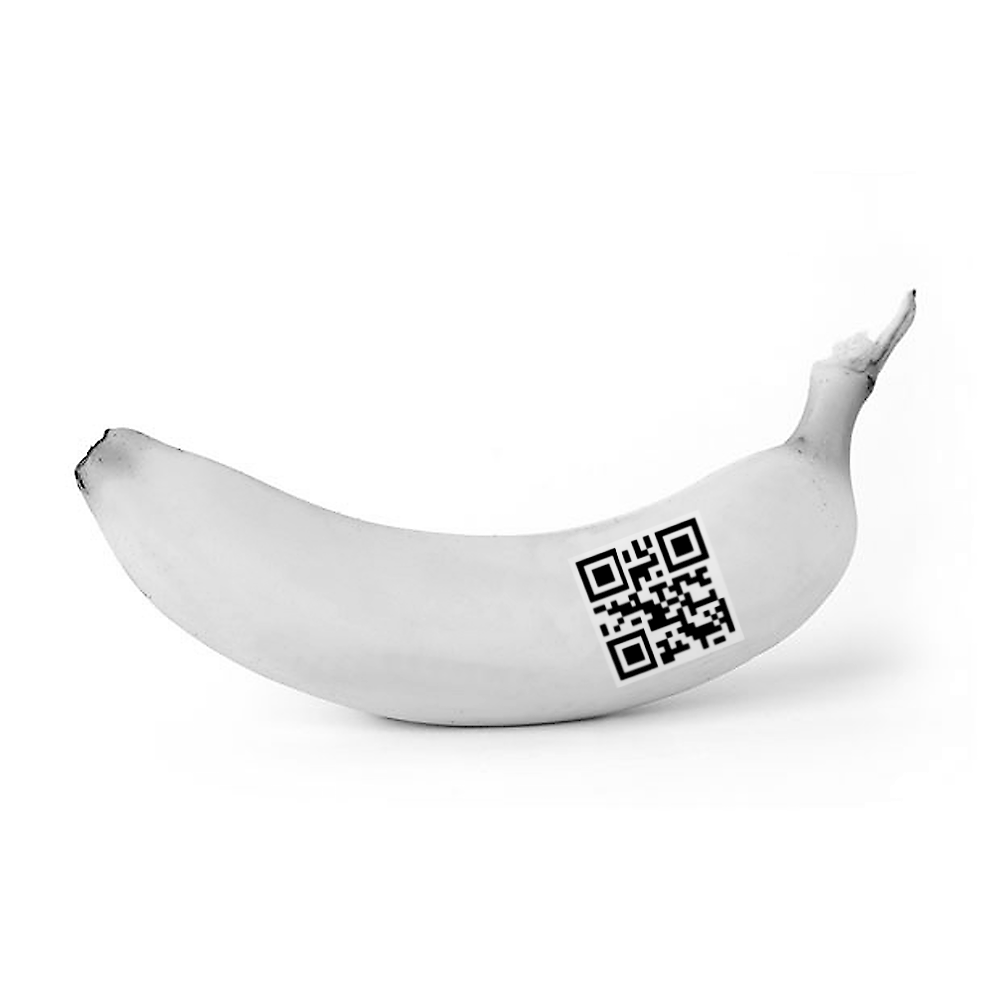

In [27]:
img = cv2.imread("./Test Cases/14-BANANAAA!!!.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)
cv2_imshow(img)

if img is None:
    print("Error: Could not read image!")
    exit()

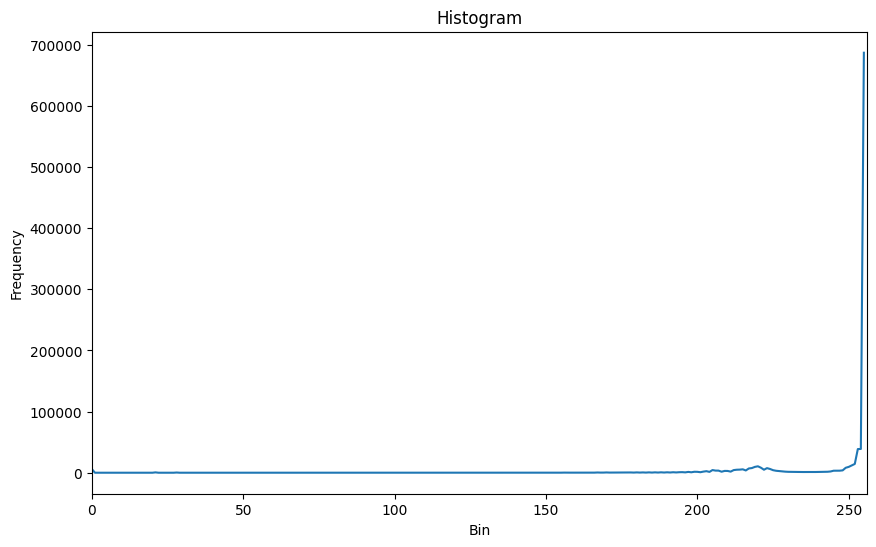

In [28]:
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

has_colors_other_than_black_white = np.any(histogram[1:-1])  # Using numpy.any


# Plot the histogram
plt.figure(figsize=(10, 6))
plt.title("Histogram")
plt.xlabel("Bin")
plt.ylabel("Frequency")
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

The image has colors other than 0 and 255. Converting to pure black and white.


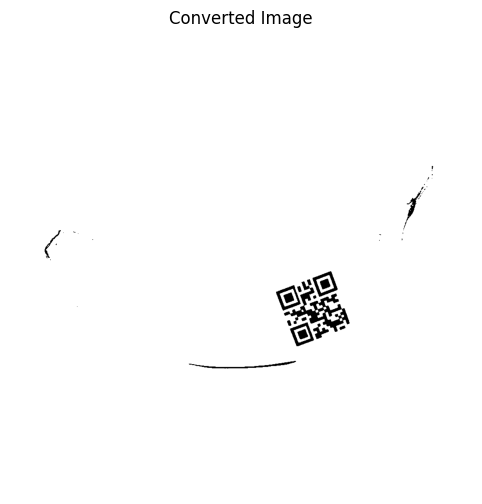

In [32]:
has_intermediate_colors = False
for i in range(1, 255):
    if histogram[i] > 0:
        has_intermediate_colors = True
        break

# Convert the image to pure black and white if it has intermediate colors
if has_intermediate_colors:
    print("The image has colors other than 0 and 255. Converting to pure black and white.")

    # Apply thresholding to convert the image
    _, binary_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Display the converted image
    plt.figure(figsize=(10, 6))
    plt.title("Converted Image")
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')
    plt.show()
else:
    print("The image has only 0 and 255 colors (pure black and pure white).")

QR code tilt angle: 90.0 degrees
The QR code is tilted. Rotating the image to fix the orientation.


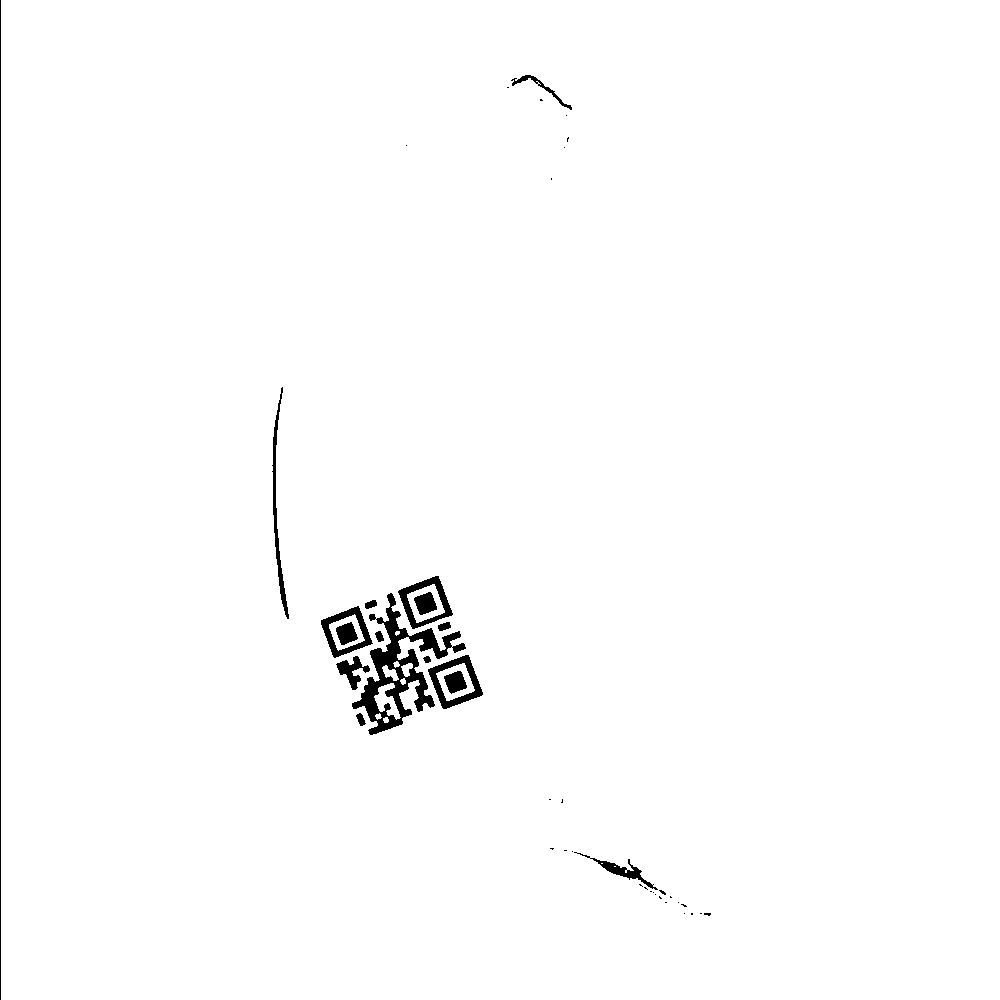

In [45]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

if len(contours) > 0:
    # Find the largest contour (assuming it's the QR code)
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Calculate the rotation angle
    rect = cv2.minAreaRect(largest_contour)
    angle = rect[2]

    print("QR code tilt angle:", angle, "degrees")

    if abs(angle) > 5:
        print("The QR code is tilted. Rotating the image to fix the orientation.")

        # Rotate the image to straighten the QR code
        rows, cols = binary_image.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), -angle, 1)
        rotated_image = cv2.warpAffine(binary_image, rotation_matrix, (cols, rows))

        # Display the rotated image
        cv2_imshow(rotated_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("The QR code is not tilted.")
else:
    print("No QR code detected in the image.")